In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización
from sklearn.preprocessing import RobustScaler
from scipy.stats import kstest
from sklearn.preprocessing import StandardScaler
import pickle

# Errores
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_casual = pd.read_pickle('../datos_finales/archivo_casual.pkl')
df_casual.head(2)

,estacion,año,mes,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,usuarios_casuales
0,invierno,2018,Enero,Lunes,festivo,nuboso,14.110847,80.5833,10.749882,331
1,invierno,2018,Enero,Martes,laborable,nuboso,14.902598,69.6087,16.652113,131


In [4]:
df_registrados = pd.read_pickle('../datos_finales/archivo_registrados.pkl')
df_registrados.head(2)

,estacion,año,mes,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,usuarios_registrados
0,invierno,2018,Enero,Lunes,festivo,nuboso,14.110847,80.5833,10.749882,654
1,invierno,2018,Enero,Martes,laborable,nuboso,14.902598,69.6087,16.652113,670


In [5]:
df_total = pd.read_pickle('../datos_finales/archivo_total.pkl')
df_total.head(2)

,estacion,año,mes,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,total_usuarios
0,invierno,2018,Enero,Lunes,festivo,nuboso,14.110847,80.5833,10.749882,985
1,invierno,2018,Enero,Martes,laborable,nuboso,14.902598,69.6087,16.652113,801


In [6]:
numericas = df_total.select_dtypes(np.number).drop("total_usuarios", axis= 1).drop('año', axis = 1)

### Robust Scaler

In [9]:
robust = RobustScaler()
numericas_robust = pd.DataFrame(robust.fit_transform(numericas), columns = numericas.columns)
numericas_robust.head(2)

,temperatura,humedad,velocidad_viento
0,-0.486274,0.855582,-0.208909
1,-0.425690,0.332722,0.687550


In [12]:
with open ("../datos_finales/predicciones/estandarizacion.pkl", "wb") as f:
    pickle.dump(robust, f)

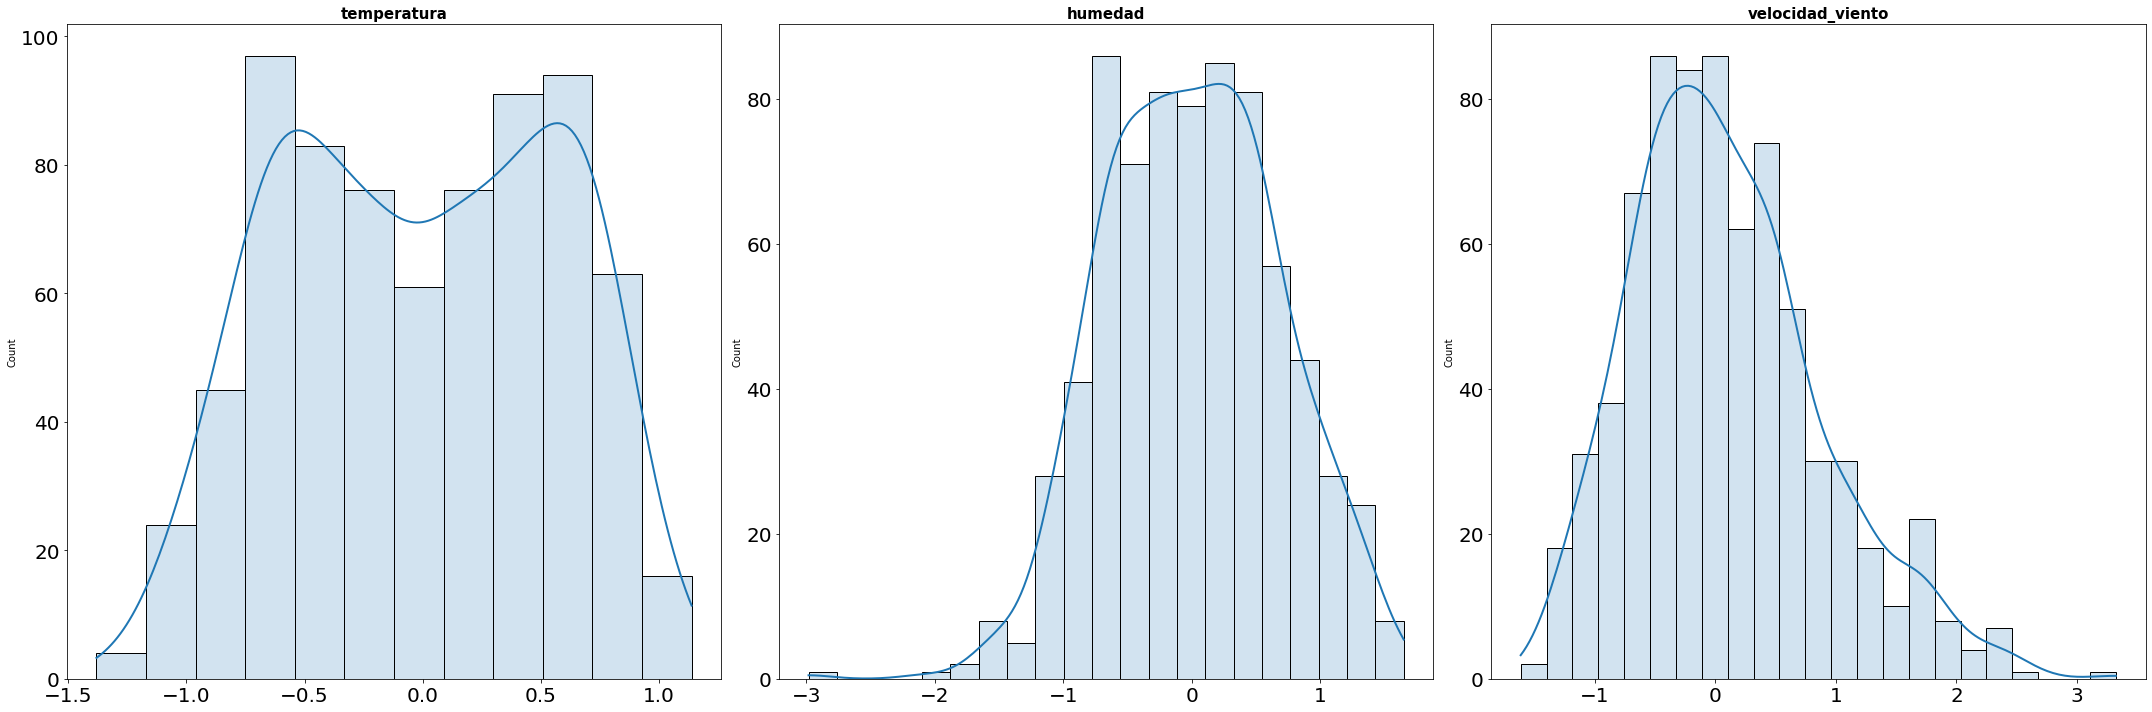

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

columnas_robust = numericas_robust.columns

axes = axes.flat

for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

In [14]:
for col in columnas_robust:
    print(f'La columna {col}, tiene el p-valor {kstest(numericas[col], "norm")[-1]}')

La columna temperatura, tiene el p-valor 0.0
La columna humedad, tiene el p-valor 0.0
La columna velocidad_viento, tiene el p-valor 0.0


In [15]:
df_casual[columnas_robust] = numericas_robust
df_total[columnas_robust] = numericas_robust
df_registrados[columnas_robust] = numericas_robust

In [16]:
df_casual.to_pickle('../datos_finales/archivo_casual_est.pkl')
df_registrados.to_pickle('../datos_finales/archivo_registrados_est.pkl')
df_total.to_pickle('../datos_finales/archivo_total_est.pkl')

### Standard Scaler

In [17]:
scaler = StandardScaler()

In [18]:
numericas_estandar = pd.DataFrame(scaler.fit_transform(numericas), columns = numericas.columns)
numericas_estandar.head(2)

,temperatura,humedad,velocidad_viento
0,-0.827613,1.252343,-0.387833
1,-0.722069,0.480996,0.748899


In [19]:
for col in numericas_estandar.columns:
    print(f'La columna {col}, tiene el p-valor {kstest(numericas_estandar[col], "norm")[-1]}')

La columna temperatura, tiene el p-valor 0.0008168084884888232
La columna humedad, tiene el p-valor 0.36110084353861616
La columna velocidad_viento, tiene el p-valor 0.00675715145775531


### Manual

In [20]:
def estandarizacion_manual(df, lista_cols):
    for col in lista_cols:
        media = df[col].mean()
        desviacion = df[col].std()
        df[col] = (df[col] - media) / desviacion
        

In [21]:
estandarizacion_manual(numericas, numericas.columns)

In [22]:
for col in numericas.columns:
    print(f'La columna {col}, tiene el p-valor {kstest(numericas[col], "norm")[-1]}')

La columna temperatura, tiene el p-valor 0.0008441595872714273
La columna humedad, tiene el p-valor 0.3668342710600636
La columna velocidad_viento, tiene el p-valor 0.0067552934601946045


### Conclusión

De los tres métodos empleados, nos quedamos con el RobustScaler porque no hemos tratado outliers.